In [1]:
import pyaerocom as pya
import matplotlib.pyplot as plt
import pyaerocom as pya
from pyaerocom.io.readungridded import ReadUngridded
from pyaerocom.io.readgridded import ReadGridded
from pyaerocom.io.helpers_units import (unitconv_sfc_conc_bck, 
                                        unitconv_sfc_conc, 
                                        unitconv_wet_depo_bck,
                                        unitconv_wet_depo, unitconv_wet_depo_from_emep)
import pandas as pd
import numpy as np
from pyaerocom.plot import df_to_heatmap
%matplotlib inline

Initating pyaerocom configuration
Checking database access...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.013 s
/home/hannas/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/hannas/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [62]:
list_gridded_data

[pyaerocom.GriddedData
 Grid data: <iris 'Cube' of wetso4 / (kg m-2 s-1) (time: 12; latitude: 80; longitude: 160)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of wet deposition rate of so4 / (kg m-2 s-1) (time: 12; latitude: 96; longitude: 144)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of tendency_of_atmosphere_mass_content_of_sulfate_dry_aerosol_particles_due_to_wet_deposition / (kg m-2 s-1) (time: 12; latitude: 180; longitude: 288)>]

In [165]:
def construct_df_model_intercomparison_to_observations(vars_to_retrieve = 'wetso4', 
                                                       OBS_network = 'GAWTADsubsetAasEtAl', 
                                                       list_model_ID = ['OsloCTM3v1.01-met2010_AP3-CTRL', 
                                                                        'CAM5-ATRAS_AP3-CTRL'], 
                                                       bias = True, 
                                                       rmse = True):
    
    ungridded_data    = ReadUngridded().read(datasets_to_read = OBS_network, vars_to_retrieve = vars_to_retrieve)
    list_gridded_data = [pya.io.ReadGridded(ID).read(vars_to_retrieve = [vars_to_retrieve], start = 2010)[0] 
                         for ID in list_model_ID ]
    
    # Possible to retrieve ts type of obeservation 
    list_colocate = []
    for gridded_data in list_gridded_data:
        list_colocate.append(pya.colocation.colocate_gridded_ungridded(gridded_data, 
                                                                       ungridded_data, 
                                                                       ts_type='monthly'))
    # call merged : raw, bias : Bias, rmse : RMSE 
    def fix_df(df):
        df = df.unstack('data_source').swaplevel().unstack('station_name')
        df2 = df['wetso4']
        df2.columns = df2.columns.swaplevel(0,1)
        df2.sort_index(axis = 1, level = (0, 1), inplace = True)
        return df2
    
    dataframes = [ coloc.data.to_dataframe().drop(columns=['var_name', 'var_units','ts_type_src','altitude', 
                                                           'latitude', 'longitude']) for coloc in list_colocate ]
    dataframes = [fix_df(df) for df in dataframes]
    #print(dataframes)
    lala = pd.concat(dataframes, axis = 1)
    lala.sort_index(axis = 1, level = (0, 1), inplace = True)
    df = lala.loc[:, ~lala.columns.duplicated()]
    return df

In [167]:
df = construct_df_model_intercomparison_to_observations()

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_2010_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_orog_Surface_1750_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_sftlf_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed'

 Checks for different number of columns
New version edited by hanna.


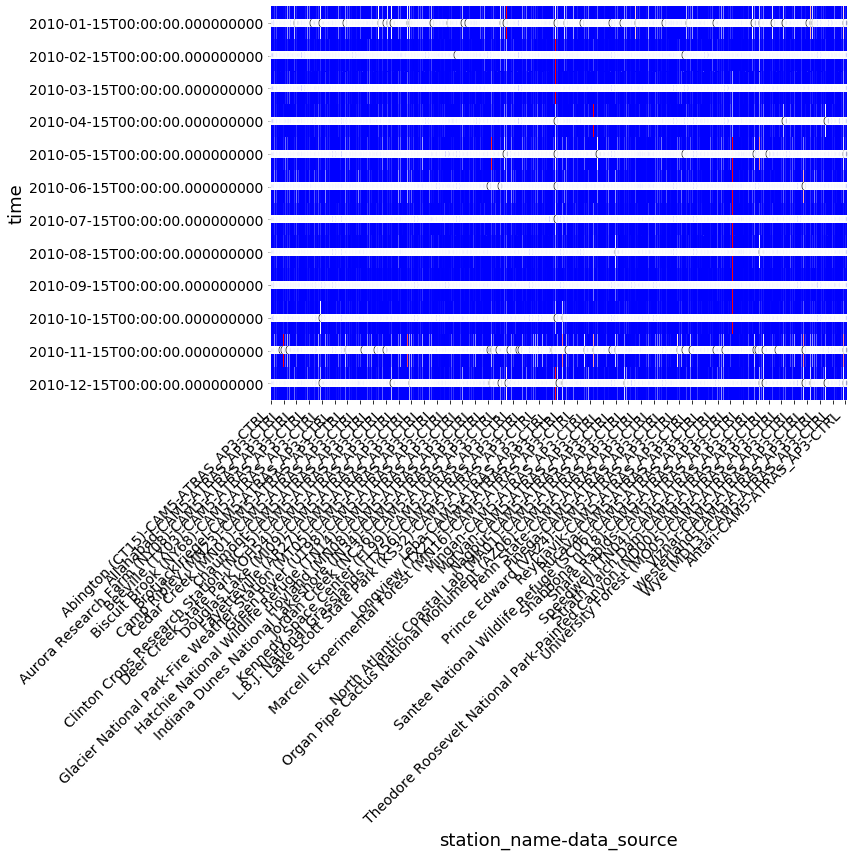

In [169]:
ax = df_to_heatmap(df, )

## TODO : Continue with calculating bias and plotting bias 

In [ ]:
df.

In [148]:
ungridded_data = ReadUngridded().read(datasets_to_read = OBS_network, vars_to_retrieve = vars_to_retrieve)
list_gridded_data = [pya.io.ReadGridded(ID).read(vars_to_retrieve = [vars_to_retrieve], start = 2010)[0] 
                     for ID in list_model_ID ]

# Possible to retrieve ts type of obeservation 
list_colocate = []
for gridded_data in list_gridded_data:
    list_colocate.append(pya.colocation.colocate_gridded_ungridded(gridded_data, 
                                                                   ungridded_data,  
                                                                   ts_type='monthly'))

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_2010_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_orog_Surface_1750_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_sftlf_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed'

In [149]:
# call merged : raw, bias : Bias, rmse : RMSE 
def fix_df(df):
    df = all_stations.unstack('data_source').swaplevel().unstack('station_name')
    df2 = df['wetso4']
    df2.columns = df2.columns.swaplevel(0,1)
    df2.sort_index(axis = 1, level = (0, 1), inplace = True)
    return df2

In [138]:
list_colocate[0].data_source

<xarray.DataArray 'data_source' (data_source: 2)>
array(['GAWTADsubsetAasEtAl', 'OsloCTM3v1.01-met2010_AP3-CTRL'], dtype='<U30')
Coordinates:
  * data_source  (data_source) <U30 'GAWTADsubsetAasEtAl' 'OsloCTM3v1.01-met2010_AP3-CTRL'
    var_name     (data_source) <U6 'wetso4' 'wetso4'
    var_units    (data_source) <U10 'kg m-2 s-1' 'kg m-2 s-1'
    ts_type_src  (data_source) <U7 'monthly' 'monthly'

In [139]:
list_colocate[1].data_source

<xarray.DataArray 'data_source' (data_source: 2)>
array(['GAWTADsubsetAasEtAl', 'CAM5-ATRAS_AP3-CTRL'], dtype='<U19')
Coordinates:
  * data_source  (data_source) <U19 'GAWTADsubsetAasEtAl' 'CAM5-ATRAS_AP3-CTRL'
    var_name     (data_source) <U6 'wetso4' 'wetso4'
    var_units    (data_source) <U10 'kg m-2 s-1' 'kg m-2 s-1'
    ts_type_src  (data_source) <U7 'monthly' 'monthly'

In [141]:
(list_colocate[1].data).to_dataframe()

var_name  \
data_source         time       station_name                                                  
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                      wetso4   
                               Acadia National Park-McFarland Hill (ME98)           wetso4   
                               Agronomy Center for Research and Extension (IN41)    wetso4   
                               Akwesasne Mohawk-Fort Covington (NY22)               wetso4   
                               Alamosa (CO00)                                       wetso4   
                               Algoma                                               wetso4   
                               Alhambra (IL46)                                      wetso4   
                               Allahabad                                            wetso4   
                               Ann Arbor (MI52)                                     wetso4   
                               Arendtsville (PA00)                                  wetso4   
                               Ashland Wildlife Area (MO03)                         wetso4   
                               Aspvreten                                            wetso4   
                               Assateague Island National Seashore-Woodcock (M...   wetso4   
                               Attwater Prairie Chicken National Wildlife Refu...   wetso4   
                               Aurora Research Farm (NY08)                          wetso4   
                               BANIZOUMBOU                                          wetso4   
                               Babcock State Park (WV04)                            wetso4   
                               Bandelier National Monument (NM07)                   wetso4   
                               Barcarrota                                           wetso4   
                               Bay D'Espoir                                         wetso4   
                               Beaufort (NC06)                                      wetso4   
                               Beeville (TX03)                                      wetso4   
                               Bellville (GA20)                                     wetso4   
                               Bennett Bridge (NY52)                                wetso4   
                               Bennington (VT01)                                    wetso4   
                               Big Bend National Park - K-Bar (TX04)                wetso4   
                               Big Springs Fish Hatchery (IA08)                     wetso4   
                               Birkenes                                             wetso4   
                               Biscuit Brook (NY68)                                 wetso4   
                               Black Belt Research & Extension Center (AL10)        wetso4   
...                                                                                    ...   
CAM5-ATRAS_AP3-CTRL 2010-12-15 Unionville (MI51)                                    wetso4   
                               University Forest (MO05)                             wetso4   
                               Valentia Observatory                                 wetso4   
                               Verna Well Field (FL41)                              wetso4   
                               Vilsandi                                             wetso4   
                               Virolahti II                                         wetso4   
                               Visakhapatnam                                        wetso4   
                               Voyageurs National Park-Sullivan Bay (MN32)          wetso4   
                               Víznar                                               wetso4   
                               Waldhof                                              wetso4   
                               Walker Br

# Soo far soo good.

In [154]:
#second
def fix_df(df):
    df = df.unstack('data_source').swaplevel().unstack('station_name')
    df2 = df['wetso4']
    df2.columns = df2.columns.swaplevel(0,1)
    df2.sort_index(axis = 1, level = (0, 1), inplace = True)
    return df
    

In [155]:
pd.concat([fix_df(first)['wetso4'], fix_df(second)['wetso4']], axis

wetso4                                             \
data_source  GAWTADsubsetAasEtAl                                              
station_name     Abington (CT15) Acadia National Park-McFarland Hill (ME98)   
time                                                                          
2010-01-15                   NaN                                   0.000895   
2010-02-15              0.001201                                        NaN   
2010-03-15              0.002394                                        NaN   
2010-04-15              0.001815                                        NaN   
2010-05-15              0.002136                                   0.001622   
2010-06-15              0.004404                                   0.005062   
2010-07-15              0.002919                                   0.001510   
2010-08-15              0.004150                                   0.001890   
2010-09-15                   NaN                                   0.002080   
2010-10-15                   NaN                                        NaN   
2010-11-15              0.001329                                   0.001618   
2010-12-15              0.001029                                   0.000951   

                                                                \
data_source                                                      
station_name Agronomy Center for Research and Extension (IN41)   
time                                                             
2010-01-15                                            0.000783   
2010-02-15                                            0.001399   
2010-03-15                                            0.005291   
2010-04-15                                            0.003849   
2010-05-15                                            0.005324   
2010-06-15                                            0.009547   
2010-07-15                                            0.004754   
2010-08-15                                            0.002539   
2010-09-15                                            0.001780   
2010-10-15                                            0.001040   
2010-11-15                                            0.003074   
2010-12-15                                            0.001163   

                                                                              \
data_source                                                                    
station_name Akwesasne Mohawk-Fort Covington (NY22) Alamosa (CO00)    Algoma   
time                                                                           
2010-01-15                                 0.001085       0.000022  0.000995   
2010-02-15                                 0.000718       0.000012  0.000099   
2010-03-15                                 0.001286       0.000235  0.000515   
2010-04-15                                 0.001479       0.000231  0.002138   
2010-05-15                                 0.002148       0.000067  0.001588   
2010-06-15                                 0.004924       0.000058  0.001664   
2010-07-15                                 0.003165       0.000313  0.003054   
2010-08-15                                 0.007013       0.000201  0.004463   
2010-09-15                                 0.003467       0.000231  0.006738   
2010-10-15                                 0.002338       0.000302  0.002047   
2010-11-15                                 0.001318            NaN  0.003953   
2010-12-15                                 0.000537       0.000101  0.002248   

                                                                             \
data_source                                                                   
station_name Alhambra (IL46) Allahabad Ann Arbor (MI52) Arendtsville (PA00)   
time                                                                          
2010-01-15          0.001566  0.000063         0.000470            0.002360   
2010-02-15          0.002601

wetso4                                             \
data_source  CAM5-ATRAS_AP3-CTRL                                              
station_name     Abington (CT15) Acadia National Park-McFarland Hill (ME98)   
time                                                                          
2010-01-15          7.619458e-12                               5.537940e-12   
2010-02-15          8.648099e-12                               8.428183e-12   
2010-03-15          3.736910e-11                               3.641364e-11   
2010-04-15          4.198654e-11                               2.615322e-11   
2010-05-15          2.833630e-11                               2.949562e-11   
2010-06-15          7.977421e-11                               9.967082e-11   
2010-07-15          4.711749e-11                               3.317911e-11   
2010-08-15          4.453999e-11                               3.011176e-11   
2010-09-15          4.918928e-11                               4.862604e-11   
2010-10-15          2.946043e-11                               3.486638e-11   
2010-11-15          1.964703e-11                               3.115853e-11   
2010-12-15          5.828273e-12                               5.741043e-12   

                                                                \
data_source                                                      
station_name Agronomy Center for Research and Extension (IN41)   
time                                                             
2010-01-15                                        1.879829e-11   
2010-02-15                                        2.397757e-11   
2010-03-15                                        7.139081e-11   
2010-04-15                                        6.164071e-11   
2010-05-15                                        8.826961e-11   
2010-06-15                                        4.266960e-11   
2010-07-15                                        3.541107e-11   
2010-08-15                                        2.770252e-11   
2010-09-15                                        2.531093e-11   
2010-10-15                                        2.143287e-11   
2010-11-15                                        2.907023e-11   
2010-12-15                                        2.134818e-11   

                                                                    \
data_source                                                          
station_name Akwesasne Mohawk-Fort Covington (NY22) Alamosa (CO00)   
time                                                                 
2010-01-15                             1.017673e-11   8.540980e-12   
2010-02-15                             7.354824e-12   1.523780e-11   
2010-03-15                             1.505087e-11   1.809670e-11   
2010-04-15                             8.275699e-11   9.685753e-12   
2010-05-15                             4.334211e-11   1.812425e-12   
2010-06-15                             9.693196e-11   8.337496e-12   
2010-07-15                             7.207842e-11   3.069668e-11   
2010-08-15                             6.389696e-11   1.099812e-11   
2010-09-15                             5.214397e-11   4.070532e-12   
2010-10-15                             3.592526e-11   1.405412e-11   
2010-11-15                             1.792456e-11   1.681433e-12   
2010-12-15                             8.930879e-12   3.763171e-12   

                                                                           \
data_source                                                                 
station_name        Algoma Alhambra (IL46)     Allahabad Ann Arbor (MI52)   
time                                                                        
2010-01-15    6.607581e-12    2.567367e-11  8.021365e-13     9.314997e-12   
2010-02-15    1.843193e-12    2.729615e-11  5.948270e-13     1.386522e-11   
2010-03-15    9.261580e-12    7.996904e-11  4.108561e-14     2.329760e-11   
2010-04-15    1.940794e-11    5.217797e-11  

In [ ]:
dataframes = [ coloc.data.to_dataframe() for coloc in list_colocate ]
for df in dataframes:
    df.drop(columns=['var_name', 'var_units','ts_type_src','altitude', 'latitude', 'longitude'], 
            inplace = True)

dataframes = [fix_df(df) for df in dataframes]

lala = pd.concat(dataframes, axis = 1).sort_index(axis = 1, level = (0, 1), inplace = True)
df = lala.loc[:, ~lala.columns.duplicated()]

In [98]:
construct_df_model_intercomparison_to_observations()

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_2010_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_orog_Surface_1750_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_sftlf_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed'

[station_name     Abington (CT15)                                 \
data_source  GAWTADsubsetAasEtAl OsloCTM3v1.01-met2010_AP3-CTRL   
time                                                              
2010-01-15                   NaN                   1.101474e-11   
2010-02-15              0.001201                   1.617417e-11   
2010-03-15              0.002394                   3.028526e-11   
2010-04-15              0.001815                   2.441301e-11   
2010-05-15              0.002136                   1.239039e-11   
2010-06-15              0.004404                   3.170837e-11   
2010-07-15              0.002919                   1.745229e-11   
2010-08-15              0.004150                   2.264605e-11   
2010-09-15                   NaN                   1.474363e-11   
2010-10-15                   NaN                   2.707664e-11   
2010-11-15              0.001329                   1.241212e-11   
2010-12-15              0.001029                   1.188433e-

AttributeError: 'NoneType' object has no attribute 'loc'

Check version of pyaerocom:

In [65]:
#pya.__version__ #0.8.1.dev1

Viewing the supported variables. 

In [66]:
#pya.browse_database('*GFDL-AM4-met2010_AP3-CTRL*')

# Problems  with collocating 'GFDL-AM4-met2010_AP3-CTRL' and aas et al 
## look more into this later

In [5]:
pya.browse_database('*GFDL-AM4-met2010_AP3-CTRL*')

Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_sftlf_Surface_2010_fixed.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_areacella_Surface_2010_fixed.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_GFDL-AM4-met2010_AP3-CTRL_rsds_Surace_2010_monthly.nc
Model: GFDL-AM4-met2010_AP3-CTRL
Error: FileConventionError("Failed to extract variable name from file aerocom3_GFDL-AM4-met2010_AP3-CTRL_rsds_Surace_2010_monthly.nc using file convention aerocom3.\nError: FileConventionError('Invalid file name (Aerocom 3 naming convention).\\n/lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/GFDL-AM4-met2010_AP3-CTRL/renamed/aerocom3_GFDL-AM4-met2010_AP3-CTRL_rsds_Surace_2010_monthly.nc\\nInvalid string identifier for vertical coordinate: Surace')")
Failed to import file aerocom3_GFDL-AM4-met


Pyaerocom ReadGridded
---------------------
Data ID: GFDL-AM4-met2010_AP3-CTRL
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/GFDL-AM4-met2010_AP3-CTRL/renamed
Available experiments: ['AP3-CTRL']
Available years: [2010]
Available frequencies ['monthly' 'daily']
Available variables: ['abs550aer', 'ac550aer', 'airmass', 'areacella', 'cdnc', 'chepsoa', 'clt', 'dh', 'drybc', 'drydust', 'drypoa', 'dryso4', 'drysoa', 'dryss', 'ec550aer', 'emibc', 'emidust', 'emipoa', 'emiso2', 'emiss', 'loadbc', 'loaddu', 'loadlgdst', 'loadoc', 'loadsmdst', 'loadso4', 'loadss', 'mmrbc', 'mmrdust', 'mmrlgdst', 'mmroa', 'mmrpm1', 'mmrpm10', 'mmrpm2p5', 'mmrsmdst', 'mmrso4', 'mmrss', 'od550aer', 'od550bc', 'od550dust', 'od550lgdst', 'od550lt1aer', 'od550oa', 'od550smdst', 'od550so4', 'od550ss', 'od870aer', 'orog', 'pr', 'ps', 'q', 'rho', 'rlds', 'rldscs', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rsus', 'rsuscs', 'rsut', 'rsutcs', 'sftlf', 'ta', 'tas', '

In [6]:
DATA_ID_models = ['OsloCTM3v1.01-met2010_AP3-CTRL',  'CAM5-ATRAS_AP3-CTRL', 'GFDL-AM4-met2010_AP3-CTRL']

In [7]:
vars_to_retrieve = 'wetso4' # they all have the same unit

In [8]:
DATA_ID = 'GAWTADsubsetAasEtAl'
VAR_TO_READ = 'wetso4'
aas_reader = ReadUngridded(DATA_ID)
ungridded_data = aas_reader.read(datasets_to_read = 'GAWTADsubsetAasEtAl', vars_to_retrieve = 'wetso4')

In [10]:
reader_model = pya.io.ReadGridded(DATA_ID_models[0])
gridded_data = reader_model.read(vars_to_retrieve = [vars_to_retrieve], start = 2010)

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes


In [11]:
gridded_data = [pya.io.ReadGridded(ID).read(vars_to_retrieve = [vars_to_retrieve], start = 2010)[0] 
                for ID in DATA_ID_models ]

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_2010_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_orog_Surface_1750_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_sftlf_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed'

In [12]:
gridded_data

[pyaerocom.GriddedData
 Grid data: <iris 'Cube' of wetso4 / (kg m-2 s-1) (time: 12; latitude: 80; longitude: 160)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of wet deposition rate of so4 / (kg m-2 s-1) (time: 12; latitude: 96; longitude: 144)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of tendency_of_atmosphere_mass_content_of_sulfate_dry_aerosol_particles_due_to_wet_deposition / (kg m-2 s-1) (time: 12; latitude: 180; longitude: 288)>]

In [13]:
ONE = pya.colocation.colocate_gridded_ungridded(gridded_data[0], ungridded_data, ts_type='monthly')

Setting wetso4 outlier lower lim: 0.00
Setting wetso4 outlier upper lim: 10000.00
Interpolating data of shape (12, 80, 160). This may take a while.
/home/hannas/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/hannas/anaconda3/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]
Successfully interpolated cube
/home/hannas/Desktop/pyaerocom/pyaerocom/colocation.py:4

In [32]:
ONE

<xarray.DataArray 'wetso4' (data_source: 2, time: 12, station_name: 316)>
array([[[         nan, 8.948091e-04, ..., 4.474046e-03, 4.474046e-04],
        [1.201201e-03,          nan, ..., 6.563265e-03, 6.191760e-04],
        ...,
        [1.329164e-03, 1.618113e-03, ..., 7.859407e-03, 4.623181e-04],
        [1.029031e-03, 9.507347e-04, ..., 4.697748e-03, 3.355534e-04]],

       [[1.101474e-11, 1.506232e-11, ..., 3.294521e-11, 8.714301e-12],
        [1.617417e-11, 1.690011e-11, ..., 5.388155e-11, 2.028353e-11],
        ...,
        [1.241212e-11, 2.067017e-11, ..., 4.199042e-11, 9.995354e-12],
        [1.188433e-11, 1.755087e-11, ..., 2.521044e-11, 1.032021e-11]]])
Coordinates:
  * data_source   (data_source) <U30 'GAWTADsubsetAasEtAl' 'OsloCTM3v1.01-met2010_AP3-CTRL'
    var_name      (data_source) <U6 'wetso4' 'wetso4'
    var_units     (data_source) <U10 'kg m-2 s-1' 'kg m-2 s-1'
    ts_type_src   (data_source) <U7 'monthly' 'monthly'
  * time          (time) datetime64[ns] 2010-01-15

In [14]:
#two = pya.colocation.colocate_gridded_ungridded(gridded_data[2], ungridded_data, ts_type='monthly')

In [15]:
gridded_data[2].var_name

'wetso4'

In [16]:
ungridded_data

UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['wetso4']; instruments: ['wet only', 'bulk', 'bulk ', 'wet-only'];No. of stations: 370

In [17]:
THREE = pya.colocation.colocate_gridded_ungridded(gridded_data[1], ungridded_data, ts_type='monthly')

Setting wetso4 outlier lower lim: 0.00
Setting wetso4 outlier upper lim: 10000.00
Interpolating data of shape (12, 96, 144). This may take a while.
/home/hannas/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/hannas/anaconda3/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]
Successfully interpolated cube
/home/hannas/Desktop/pyaerocom/pyaerocom/colocation.py:4

In [33]:
#THREE

<xarray.DataArray 'wetso4' (data_source: 2, time: 12, station_name: 316)>
array([[[         nan, 8.948091e-04, ..., 4.474046e-03, 4.474046e-04],
        [1.201201e-03,          nan, ..., 6.563265e-03, 6.191760e-04],
        ...,
        [1.329164e-03, 1.618113e-03, ..., 7.859407e-03, 4.623181e-04],
        [1.029031e-03, 9.507347e-04, ..., 4.697748e-03, 3.355534e-04]],

       [[7.619458e-12, 5.537940e-12, ..., 3.261841e-11, 2.165039e-12],
        [8.648099e-12, 8.428183e-12, ..., 3.181980e-11, 5.903959e-12],
        ...,
        [1.964703e-11, 3.115853e-11, ..., 6.997593e-11, 3.381500e-12],
        [5.828273e-12, 5.741043e-12, ..., 1.953565e-11, 1.960589e-12]]])
Coordinates:
  * data_source   (data_source) <U19 'GAWTADsubsetAasEtAl' 'CAM5-ATRAS_AP3-CTRL'
    var_name      (data_source) <U6 'wetso4' 'wetso4'
    var_units     (data_source) <U10 'kg m-2 s-1' 'kg m-2 s-1'
    ts_type_src   (data_source) <U7 'monthly' 'monthly'
  * time          (time) datetime64[ns] 2010-01-15 2010-02-15

### Provoke collocation error

In [18]:
# two = pya.colocation.colocate_gridded_ungridded(gridded_data[2], ungridded_data, ts_type='monthly')

# Colocate 

In [19]:
all_stations = ONE.data.to_dataframe()
all_stations.head()

var_name  \
data_source         time       station_name                                                 
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                     wetso4   
                               Acadia National Park-McFarland Hill (ME98)          wetso4   
                               Agronomy Center for Research and Extension (IN41)   wetso4   
                               Akwesasne Mohawk-Fort Covington (NY22)              wetso4   
                               Alamosa (CO00)                                      wetso4   

                                                                                   var_units  \
data_source         time       station_name                                                    
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                    kg m-2 s-1   
                               Acadia National Park-McFarland Hill (ME98)         kg m-2 s-1   
                               Agronomy Center for Research and Extension (IN41)  kg m-2 s-1   
                               Akwesasne Mohawk-Fort Covington (NY22)             kg m-2 s-1   
                               Alamosa (CO00)                                     kg m-2 s-1   

                                                                                 ts_type_src  \
data_source         time       station_name                                                    
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                       monthly   
                               Acadia National Park-McFarland Hill (ME98)            monthly   
                               Agronomy Center for Research and Extension (IN41)     monthly   
                               Akwesasne Mohawk-Fort Covington (NY22)                monthly   
                               Alamosa (CO00)                                        monthly   

                                                                                  latitude  \
data_source         time       station_name                                                  
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                     41.8400   
                               Acadia National Park-McFarland Hill (ME98)          44.3772   
                               Agronomy Center for Research and Extension (IN41)   40.4749   
                               Akwesasne Mohawk-Fort Covington (NY22)              44.9226   
                               Alamosa (CO00)                                      37.4421   

                                                                                  longitude  \
data_source         time       station_name                                                   
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                     -72.0101   
                               Acadia National Park-McFarland Hill (ME98)          -68.2608   
                               Agronomy Center for Research and Extension (IN41)   -86.9924   
                               Akwesasne Mohawk-Fort Covington (NY22)              -74.4806   
                               Alamosa (CO00)                                     -105.8680   

                                                                                  altitude  \
data_source         time       station_name                                                  
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                         NaN   
                               Acadia National Park-McFarland Hill (ME98)              NaN   
                               Agronomy Center for Research and Extension (IN41)       NaN   
                               Akwesasne Mohawk-Fort Covington (NY22)                  NaN   
                               Alamosa (CO00)                                          NaN   

                                                                                    wetso4  
data_s

In [46]:
merge_with = THREE.data.to_dataframe()
merge_with.drop(columns=['var_name', 'var_units', 'ts_type_src','altitude', 'latitude', 'longitude' ])

wetso4
data_source         time       station_name                                                    
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                              NaN
                               Acadia National Park-McFarland Hill (ME98)          8.948091e-04
                               Agronomy Center for Research and Extension (IN41)   7.829580e-04
                               Akwesasne Mohawk-Fort Covington (NY22)              1.084956e-03
                               Alamosa (CO00)                                      2.237023e-05
                               Algoma                                              9.954752e-04
                               Alhambra (IL46)                                     1.565916e-03
                               Allahabad                                           6.263664e-05
                               Ann Arbor (MI52)                                    4.697748e-04
                               Arendtsville (PA00)                                 2.360059e-03
                               Ashland Wildlife Area (MO03)                        1.543546e-03
                               Aspvreten                                                    NaN
                               Assateague Island National Seashore-Woodcock (M...  6.822920e-04
                               Attwater Prairie Chicken National Wildlife Refu...  2.975240e-03
                               Aurora Research Farm (NY08)                         5.928111e-04
                               BANIZOUMBOU                                                  NaN
                               Babcock State Park (WV04)                                    NaN
                               Bandelier National Monument (NM07)                  1.901469e-04
                               Barcarrota                                          4.474046e-04
                               Bay D'Espoir                                        4.585897e-04
                               Beaufort (NC06)                                     2.214653e-03
                               Beeville (TX03)                                     1.677767e-03
                               Bellville (GA20)                                    2.673242e-03
                               Bennett Bridge (NY52)                               1.756063e-03
                               Bennington (VT01)                                            NaN
                               Big Bend National Park - K-Bar (TX04)               4.250343e-04
                               Big Springs Fish Hatchery (IA08)                    1.006660e-03
                               Birkenes                                            3.579237e-03
                               Biscuit Brook (NY68)                                1.319843e-03
                               Black Belt Research & Extension Center (AL10)                NaN
...                                                                                         ...
CAM5-ATRAS_AP3-CTRL 2010-12-15 Unionville (MI51)                                   1.141686e-11
                               University Forest (MO05)                            3.385257e-11
                               Valentia Observatory                                3.160185e-12
                               Verna Well Field (FL41)                             2.087127e-11
                               Vilsandi                                            8.424598e-12
                               Virolahti II                                        1.002713e-11
                               Visakhapatnam                                       3.465497e-11
                               Voyageurs National Park-Sullivan Bay (MN32)         4.499523e-12
                               Víznar                                              7.858172e-12
                               Waldhof                   

wetso4
data_source         time       station_name                                                    
GAWTADsubsetAasEtAl 2010-01-15 Abington (CT15)                                              NaN
                               Acadia National Park-McFarland Hill (ME98)          8.948091e-04
                               Agronomy Center for Research and Extension (IN41)   7.829580e-04
                               Akwesasne Mohawk-Fort Covington (NY22)              1.084956e-03
                               Alamosa (CO00)                                      2.237023e-05
                               Algoma                                              9.954752e-04
                               Alhambra (IL46)                                     1.565916e-03
                               Allahabad                                           6.263664e-05
                               Ann Arbor (MI52)                                    4.697748e-04
                               Arendtsville (PA00)                                 2.360059e-03
                               Ashland Wildlife Area (MO03)                        1.543546e-03
                               Aspvreten                                                    NaN
                               Assateague Island National Seashore-Woodcock (M...  6.822920e-04
                               Attwater Prairie Chicken National Wildlife Refu...  2.975240e-03
                               Aurora Research Farm (NY08)                         5.928111e-04
                               BANIZOUMBOU                                                  NaN
                               Babcock State Park (WV04)                                    NaN
                               Bandelier National Monument (NM07)                  1.901469e-04
                               Barcarrota                                          4.474046e-04
                               Bay D'Espoir                                        4.585897e-04
                               Beaufort (NC06)                                     2.214653e-03
                               Beeville (TX03)                                     1.677767e-03
                               Bellville (GA20)                                    2.673242e-03
                               Bennett Bridge (NY52)                               1.756063e-03
                               Bennington (VT01)                                            NaN
                               Big Bend National Park - K-Bar (TX04)               4.250343e-04
                               Big Springs Fish Hatchery (IA08)                    1.006660e-03
                               Birkenes                                            3.579237e-03
                               Biscuit Brook (NY68)                                1.319843e-03
                               Black Belt Research & Extension Center (AL10)                NaN
...                                                                                         ...
CAM5-ATRAS_AP3-CTRL 2010-12-15 Unionville (MI51)                                   1.141686e-11
                               University Forest (MO05)                            3.385257e-11
                               Valentia Observatory                                3.160185e-12
                               Verna Well Field (FL41)                             2.087127e-11
                               Vilsandi                                            8.424598e-12
                               Virolahti II                                        1.002713e-11
                               Visakhapatnam                                       3.465497e-11
                               Voyageurs National Park-Sullivan Bay (MN32)         4.499523e-12
                               Víznar                                              7.858172e-12
                               Waldhof                   

In [22]:
all_stations = all_stations.drop(columns=['var_name', 'var_units', 'ts_type_src','altitude', 'latitude', 'longitude' ])

# TODO swap 

In [23]:
#all_stations.unstack()['wetso4'].transpose()

In [45]:
first  = fix_df(ONE.data.to_dataframe())
second = fix_df(THREE.data.to_dataframe())

[['wetso4'], ['GAWTADsubsetAasEtAl', 'OsloCTM3v1.01-met2010_AP3-CTRL'], ['Abington (CT15)', 'Acadia National Park-McFarland Hill (ME98)', 'Agronomy Center for Research and Extension (IN41)', 'Akwesasne Mohawk-Fort Covington (NY22)', 'Alamosa (CO00)', 'Algoma', 'Alhambra (IL46)', 'Allahabad', 'Ann Arbor (MI52)', 'Arendtsville (PA00)', 'Ashland Wildlife Area (MO03)', 'Aspvreten', 'Assateague Island National Seashore-Woodcock (MD18)', 'Attwater Prairie Chicken National Wildlife Refuge (TX10)', 'Aurora Research Farm (NY08)', 'BANIZOUMBOU', 'Babcock State Park (WV04)', 'Bandelier National Monument (NM07)', 'Barcarrota', 'Bay D'Espoir', 'Beaufort (NC06)', 'Beeville (TX03)', 'Bellville (GA20)', 'Bennett Bridge (NY52)', 'Bennington (VT01)', 'Big Bend National Park - K-Bar (TX04)', 'Big Springs Fish Hatchery (IA08)', 'Birkenes', 'Biscuit Brook (NY68)', 'Black Belt Research & Extension Center (AL10)', 'Bondville (IL11)', 'Bonner Lake', 'Bradford Forest (FL03)', 'Bridgton (ME02)', 'Brooklyn Lake 

In [42]:
second.head()

station_name,Abington (CT15),Acadia National Park-McFarland Hill (ME98),Agronomy Center for Research and Extension (IN41),Akwesasne Mohawk-Fort Covington (NY22),Alamosa (CO00),Algoma,Alhambra (IL46),Allahabad,Ann Arbor (MI52),Arendtsville (PA00),...,Woodworth (ND11),Wooster (OH71),Wye (MD13),Yarner Wood,Yellowstone National Park-Tower Falls (WY08),Yosemite National Park-Hodgdon Meadow (CA99),Young Woman's Creek (PA18),Zarra,Zavizan,Ähtäri
data_source,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,...,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL
time,,,,,,,,,,,,,,,,,,,,,
2010-01-15,NaN,0.000895,0.000783,0.001085,0.000022,0.000995,0.001566,0.000063,0.000470,0.002360,...,4.391446e-12,1.498994e-11,9.371823e-12,8.338425e-12,4.312484e-12,5.019189e-12,1.560959e-11,1.269926e-11,3.294521e-11,8.714301e-12
2010-02-15,0.001201,NaN,0.001399,0.000718,0.000012,0.000099,0.002601,0.000114,0.001164,0.001932,...,1.106464e-11,2.419485e-11,2.856035e-11,1.072288e-11,3.317620e-12,8.596779e-12,2.642058e-11,1.111997e-11,5.388155e-11,2.028353e-11
2010-03-15,0.002394,NaN,0.005291,0.001286,0.000235,0.000515,0.002327,0.000000,0.002315,0.004116,...,1.140536e-11,1.812117e-11,2.985291e-11,9.776437e-12,1.046714e-11,7.095921e-12,2.085583e-11,1.448864e-11,3.650530e-11,1.680516e-11
2010-04-15,0.001815,NaN,0.003849,0.001479,0.000231,0.002138,0.002982,0.000865,NaN,NaN,...,1.095090e-11,1.538061e-11,1.567176e-11,4.290239e-12,2.073608e-11,8.883767e-12,2.250951e-11,6.892443e-12,5.244276e-11,2.122450e-11
2010-05-15,0.002136,0.001622,0.005324,0.002148,0.000067,0.001588,0.007058,0.001535,0.006197,0.003803,...,1.525082e-11,3.012205e-11,2.369581e-11,1.330386e-11,1.824092e-11,9.495459e-12,3.026222e-11,6.058135e-12,3.334834e-11,2.400646e-11


In [38]:
first.head()

station_name,Abington (CT15),Acadia National Park-McFarland Hill (ME98),Agronomy Center for Research and Extension (IN41),Akwesasne Mohawk-Fort Covington (NY22),Alamosa (CO00),Algoma,Alhambra (IL46),Allahabad,Ann Arbor (MI52),Arendtsville (PA00),...,Woodworth (ND11),Wooster (OH71),Wye (MD13),Yarner Wood,Yellowstone National Park-Tower Falls (WY08),Yosemite National Park-Hodgdon Meadow (CA99),Young Woman's Creek (PA18),Zarra,Zavizan,Ähtäri
data_source,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,GAWTADsubsetAasEtAl,...,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL,OsloCTM3v1.01-met2010_AP3-CTRL
time,,,,,,,,,,,,,,,,,,,,,
2010-01-15,NaN,0.000895,0.000783,0.001085,0.000022,0.000995,0.001566,0.000063,0.000470,0.002360,...,4.391446e-12,1.498994e-11,9.371823e-12,8.338425e-12,4.312484e-12,5.019189e-12,1.560959e-11,1.269926e-11,3.294521e-11,8.714301e-12
2010-02-15,0.001201,NaN,0.001399,0.000718,0.000012,0.000099,0.002601,0.000114,0.001164,0.001932,...,1.106464e-11,2.419485e-11,2.856035e-11,1.072288e-11,3.317620e-12,8.596779e-12,2.642058e-11,1.111997e-11,5.388155e-11,2.028353e-11
2010-03-15,0.002394,NaN,0.005291,0.001286,0.000235,0.000515,0.002327,0.000000,0.002315,0.004116,...,1.140536e-11,1.812117e-11,2.985291e-11,9.776437e-12,1.046714e-11,7.095921e-12,2.085583e-11,1.448864e-11,3.650530e-11,1.680516e-11
2010-04-15,0.001815,NaN,0.003849,0.001479,0.000231,0.002138,0.002982,0.000865,NaN,NaN,...,1.095090e-11,1.538061e-11,1.567176e-11,4.290239e-12,2.073608e-11,8.883767e-12,2.250951e-11,6.892443e-12,5.244276e-11,2.122450e-11
2010-05-15,0.002136,0.001622,0.005324,0.002148,0.000067,0.001588,0.007058,0.001535,0.006197,0.003803,...,1.525082e-11,3.012205e-11,2.369581e-11,1.330386e-11,1.824092e-11,9.495459e-12,3.026222e-11,6.058135e-12,3.334834e-11,2.400646e-11


In [29]:
df

station_name     Abington (CT15)                                 \
data_source  GAWTADsubsetAasEtAl OsloCTM3v1.01-met2010_AP3-CTRL   
time                                                              
2010-01-15                   NaN                   1.101474e-11   
2010-02-15              0.001201                   1.617417e-11   
2010-03-15              0.002394                   3.028526e-11   
2010-04-15              0.001815                   2.441301e-11   
2010-05-15              0.002136                   1.239039e-11   
2010-06-15              0.004404                   3.170837e-11   
2010-07-15              0.002919                   1.745229e-11   
2010-08-15              0.004150                   2.264605e-11   
2010-09-15                   NaN                   1.474363e-11   
2010-10-15                   NaN                   2.707664e-11   
2010-11-15              0.001329                   1.241212e-11   
2010-12-15              0.001029                   1.188433e-11   

station_name Acadia National Park-McFarland Hill (ME98)  \
data_source                         GAWTADsubsetAasEtAl   
time                                                      
2010-01-15                                     0.000895   
2010-02-15                                          NaN   
2010-03-15                                          NaN   
2010-04-15                                          NaN   
2010-05-15                                     0.001622   
2010-06-15                                     0.005062   
2010-07-15                                     0.001510   
2010-08-15                                     0.001890   
2010-09-15                                     0.002080   
2010-10-15                                          NaN   
2010-11-15                                     0.001618   
2010-12-15                                     0.000951   

station_name                                 \
data_source  OsloCTM3v1.01-met2010_AP3-CTRL   
time                                          
2010-01-15                     1.506232e-11   
2010-02-15                     1.690011e-11   
2010-03-15                     2.070596e-11   
2010-04-15                     1.149291e-11   
2010-05-15                     1.425061e-11   
2010-06-15                     4.085760e-11   
2010-07-15                     2.291286e-11   
2010-08-15                     1.132537e-11   
2010-09-15                     1.449737e-11   
2010-10-15                     2.187046e-11   
2010-11-15                     2.067017e-11   
2010-12-15                     1.755087e-11   

station_name Agronomy Center for Research and Extension (IN41)  \
data_source                                GAWTADsubsetAasEtAl   
time                                                             
2010-01-15                                            0.000783   
2010-02-15                                            0.001399   
2010-03-15                                            0.005291   
2010-04-15                                            0.003849   
2010-05-15                                            0.005324   
2010-06-15                                            0.009547   
2010-07-15                                            0.004754   
2010-08-15                                            0.002539   
2010-09-15                                            0.001780   
2010-10-15                                            0.001040   
2010-11-15                                            0.003074   
2010-12-15                                            0.001163   

station_name                                 \
data_source  OsloCTM3v1.01-met2010_AP3-CTRL   
time                                          
2010-01-15                     1.540255e-11   
2010-02-15                     1.622979e-11   
2010-03-15                     2.868071e-11   
2010-04-15                     1.701637e-11   
2010-05-15                     3.524035e-11   
2010-06-15                     2.59

 Checks for different number of columns
New version edited by hanna.


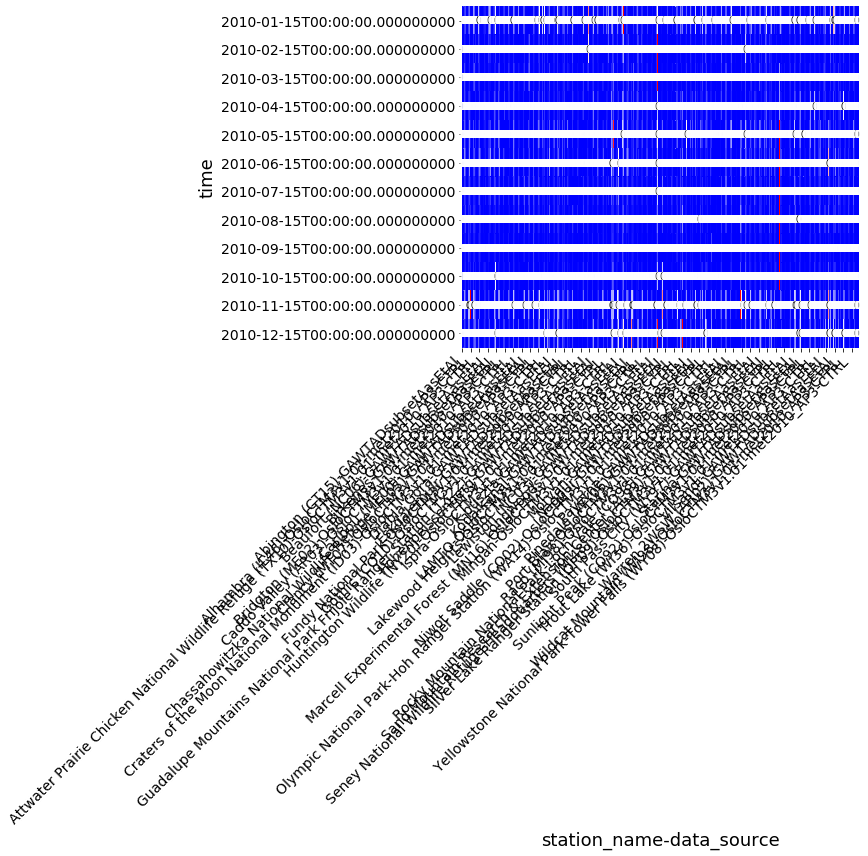

In [30]:
df_to_heatmap(lala)

In [31]:
#all_st = pd.concat(all_stations.unstack('data_source'), axis = 1)

In [ ]:
table = ONE.data.sel(station_name = 'Abington (CT15)').to_dataframe()
table2 = THREE.data.sel(station_name = 'Abington (CT15)').to_dataframe()
table  = table.drop(columns=['var_name', 'var_units', 'ts_type_src', 'station_name', 
                              'altitude', 'latitude', 'longitude' ])

table2 = table2.drop(columns=['var_name', 'var_units', 'ts_type_src', 'station_name', 
                              'altitude', 'latitude', 'longitude' ])
table2 = table2
table = table

In [ ]:
table = table.unstack('data_source')['wetso4']
table2 = table2.unstack('data_source')['wetso4']

In [ ]:
idx = pd.IndexSlice

In [ ]:
obs = table['GAWTADsubsetAasEtAl']

In [ ]:
table.drop('GAWTADsubsetAasEtAl', axis = 1, inplace=True)
table2.drop('GAWTADsubsetAasEtAl', axis = 1, inplace=True)

In [ ]:
model = pd.concat([table, table2], axis = 1)

In [ ]:
model 

In [ ]:
obs_df = pd.DataFrame(obs)

In [ ]:
obs_df

In [ ]:
merged = pd.concat([obs_df, model], axis = 1, keys = ['obs', 'model'])

In [ ]:
merged

In [ ]:
bias = merged['model'] - merged['obs'].values

In [ ]:
#merged = pd.concat([merged, bias], axis = 1, keys = ['bias'])

In [ ]:
#merged

In [ ]:
new = pd.concat([merged['obs'], merged['model'], bias], axis = 1, keys = ['obs', 'model', 'bias'])

In [ ]:
new

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
bias

In [ ]:
merged['model']**2 - merged['obs'].values**2 

In [ ]:
def pandas_mse(merged):
    return (merged['model'] - merged['obs'].values )**2

def pandas_r2():
    pass

def pandas_mae(merged):
    return np.abs(merged['model'] - merged['obs'].values )

In [ ]:
# TODO 

In [ ]:
ax = df_to_heatmap(merged, num_digits=8, cbar = True, table_name = 'Data')

In [ ]:
mse = 

In [ ]:
mse

In [ ]:
#r2score = r2_score( merged['model'], merged['obs'].values )

In [ ]:
#osloctm.loc[:, idx[:, 'OsloCTM3v1.01-met2010_AP3-CTRL']]

In [ ]:
#osloctm = table.drop('OsloCTM3v1.01-met2010_AP3-CTRL', axis = 1)

In [ ]:
table2.drop('GAWTADsubsetAasEtAl', axis = 1)

In [ ]:
np.concat([table, table2], axis = 1, keys = [])

In [ ]:
df = table.merge(table2, left_index = True, right_on = ['time'])

In [ ]:
df.rename(columns = {'wetso4_x':'raw', 'wetso4_y':'model', 'GAWTADsubsetAasEtAl':'obs', 
          'OsloCTM3v1.01-met2010_AP3-CTRL': 'OsloCTM3', 'CAM5-ATRAS_AP3-CTRL': 'CAM5-ATRAS'}, inplace = True)

In [ ]:
idx = pd.IndexSlice
biasOsloCTM3 = df.loc[:, idx[:, 'OsloCTM3']]   - df.loc[:, idx[:, 'obs']]['model'].values
biasCAM5     = df.loc[:, idx[:, 'CAM5-ATRAS']] - df.loc[:, idx[:, 'obs']]['model'].values

In [ ]:
biasOsloCTM3.rename( columns = {'raw':'Bias'}, inplace = True)
biasCAM5.rename( columns = {'model':'Bias'}, inplace = True)

In [ ]:
df

In [ ]:
df = df.merge(biasOsloCTM3, left_index = True, right_on = ['time'])

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.loc[:, idx['raw', 'OsloCTM3']]

In [ ]:
df.loc[:, idx['raw', 'OsloCTM3']]

In [ ]:
df = df.merge(biasCAM5, left_index = True, right_on = ['time'])

In [ ]:
df.columns

In [ ]:
df_to_heatmap(df, cmap="PuBu", num_digits = 10, cbar=True)

In [ ]:
import seaborn as sns

In [ ]:
ax = sns.heatmap(df['model_x'])
ax.set_yticklabels(np.arange(12))
ax.set_ylabel('Month')
plt.show()

In [ ]:
ax

In [ ]:
#table.unstack('data_source').merge(table2.unstack('data_source'), right_on = ['data_source'], left_index = True)

In [ ]:
#table.pivot(columns=['data_source'], index = ['time'])

In [ ]:
#table.concatenate(table2, left_index = True, right_on = ['data_source', 'time'])

In [ ]:
table2

In [ ]:
table

In [ ]:
table.columns

In [ ]:
table

In [ ]:
df_to_heatmap(table2)

In [ ]:
table

In [ ]:
table = pd.merge(table, table2, right_on='wetso4', left_index=True)

In [ ]:
table 

In [ ]:
table['wetso4']['OsloCTM'] = table['raw']['OsloCTM']

In [ ]:
table

In [ ]:
table.columns.names[1] = None

In [ ]:
df = cropped

In [ ]:
idx = df.unstack(0)

In [ ]:
table['raw'].columns.name = None

In [ ]:
table

In [ ]:
df_to_heatmap(table['raw'])

In [ ]:
data = df.join(df['wetso4']['OsloCTM3v1.01-met2010_AP3-CTRL'].subtract(df['wetso4']['GAWTADsubsetAasEtAl']).rename(
        columns={'OsloCTM3v1.01-met2010_AP3-CTRL':'bias'}))

In [ ]:
cropped['wetso4']['hh'] = np.arange(12)

In [ ]:
cropped

In [ ]:
closer = cropped.unstack(0)

In [ ]:
closer['bias'] = closer['OsloCTM3v1.01-met2010_AP3-CTRL'] -  closer['GAWTADsubsetAasEtAl']

In [ ]:
closer

In [ ]:
closer.index

In [ ]:
closer.index = [time.month for time in closer.index]

In [ ]:
closer

In [ ]:
data = data_coloc.data.sel(data_source = 'GAWTADsubsetAasEtAl', station_name = 'Abington (CT15)')
df_obs = data.to_dataframe()

data = data_coloc.data.sel(data_source = 'OsloCTM3v1.01-met2010_AP3-CTRL', station_name = 'Abington (CT15)')
df_model = data.to_dataframe()

In [ ]:
# bias =  is the difference .. 

In [ ]:
bias = df_obs['wetso4'] - df_model['wetso4']

In [ ]:
hh = pd.DataFrame({'bias': bias})

In [ ]:
hh

In [ ]:
df_to_heatmap(hh)

In [ ]:
all_stations = data.station_name.values

In [ ]:
df = data_coloc.data.to_dataframe()

In [ ]:
df

In [ ]:
import pandas as pd

In [ ]:
for s in all_stations[:2]:
    

# Reading original files. 

In [ ]:
files = ['/lustre/storeA/project/aerocom/aerocom1//AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so2.csv', 
         '/lustre/storeA/project/aerocom/aerocom1//AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so4_aero.csv', 
         '/lustre/storeA/project/aerocom/aerocom1//AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so4_precip.csv']

In [ ]:
df = pd.read_csv(files[-1], sep=",", low_memory=False)
subset = df[df.station_name == 'Algoma']
vals = subset['deposition_kgS/ha'].astype(float).values

DATA_ID = 'GAWTADsubsetAasEtAl'
reader = ReadUngridded(DATA_ID)
ungridded = reader.read(datasets_to_read = 'GAWTADsubsetAasEtAl', vars_to_retrieve = 'wetso4')

station = ungridded.to_station_data('Algoma', 'wetso4')
conv = unitconv_sfc_conc_bck(station.wetso4.values, 2)

In [ ]:
df = pd.read_csv(files[-1], sep=",", low_memory=False)
subset = df[df.station_name == 'Algoma']
vals = subset['deposition_kgS/ha'].astype(float).values
# Converting month and year. 
tconv = lambda yr, m : np.datetime64('{:04d}-{:02d}-{:02d}'.format(yr, m, 1), 's')
dates_alt = [tconv(yr, m) for yr, m in
             zip(subset.year.values, subset.month.values)]
subset['dtime'] = np.array(dates_alt)

from scipy.constants import Avogadro

mmSO4 = 0.001*32.065 + 0.001*15.999*4 # kg/mol
mm_s = 32.065*0.001 # kg/mol

nr_molecules = vals*Avogadro/mm_s  #[1]
mass_SO4 = nr_molecules*mmSO4/Avogadro # mass in kg

days_in_month = subset['dtime'].dt.daysinmonth
monthly_to_sec = days_in_month*24*60*60

mass_pr_square_m_pr_sek = (mass_SO4/(10000*monthly_to_sec)).values

In [ ]:
# mass_pr_square_m_pr_sekneed to update the package

## Plotting stations maps

In [ ]:
ax = merged_meta_sev.plot_station_coordinates(markersize=12, color='lime', label = " sconcso2, sconcso4")
data.plot_station_coordinates(markersize=3, color='red', ax = ax,  label = "sconcso4")

## Plotting using a dataset which contain one variable

In [ ]:
algoma = data.to_station_data('Algoma', 'sconcso2')
abington = data.to_station_data('Abington', 'sconcso2')
alhambra = data.to_station_data('Alhambra', 'sconcso2')

In [ ]:
algoma.get_meta()

In [ ]:
algoma.country # None

In [ ]:
algoma.station_coords

In [ ]:
def cast_coords_to_string(station):
    """ Help function for creating labels, usefull when plotting several stations.  """
    return "({}, {}, {})".format(station.latitude, station.longitude, station.altitude)

In [ ]:
ax = algoma.plot_timeseries('sconcso2', label = algoma.station_name + ", " + cast_coords_to_string(algoma))
abington.plot_timeseries('sconcso2', ax = ax, label = abington.station_name) 
alhambra.plot_timeseries('sconcso2', ax = ax, label = alhambra.station_name) 
ax.set_title("Plotting Several Stations In One Figure")

# Plotting using a dataset which contain several variable

In [ ]:
merged_meta_sev.to_station_data('[Algoma]', ['sconcso2', 'sconcso4'])

## How to find common stations with another data set 

After reading one variable, shoudn't the dataset data only contain one variable. This works in the python script.

In [ ]:
data.contains_vars

In [ ]:
data2.contains_vars

## Plotting all available stations for the two variables "sconsso2" and "sconsso4"

In [ ]:
ax = data.plot_station_coordinates(markersize=12, color='lime', label = "all variables")
data2.plot_station_coordinates(markersize=5, color='red', ax = ax,  label = "sconcso4")

In [ ]:
merged = data.merge_common_meta(ignore_keys = ["station_name", 'instrument_name', 'ts_type', 'filename'])

In [ ]:
len(merged.unique_station_names), len(data.unique_station_names)

### Displaying the ten first stationnames. 

In [ ]:
data.station_name[:10]

In [ ]:
algoma = data.to_station_data('Algoma', 'sconcso2')
abington = data.to_station_data('Abington', 'sconcso2')
alhambra = data.to_station_data('Alhambra', 'sconcso2')

In [ ]:
algoma.get_meta()

# Why does this need a imput variable when algoma only contain one?

In [ ]:
ax = algoma.plot_timeseries('sconcso2', label = "algoma")
abington.plot_timeseries('sconcso2', ax = ax, label = "abingtion") 
alhambra.plot_timeseries('sconcso2', ax = ax, label = "alhambra") 
ax.set_title("Plotting Several Stations In One Figure")

In [ ]:
algoma.station_coords

In [ ]:
help(data.get_variable_data)

In [ ]:
hmm = data.get_variable_data("sconcso4")

# Below here is old code.

In [ ]:
hmm = data.get_variable_data("sconcso2")

# Find the number of common stations that have both variables

In [ ]:
len(data.find_common_stations(data2))

# Plotting a regional map over stations

In [ ]:
data.plot_station_coordinates(markersize=12, color='lime')

In [ ]:
help(data.plot_station_coordinates)

In [ ]:
data.contains_vars

# Cool function to implement plot_station_coordinates based on stationnames and of they are all in one region it filters outs by itselves.

### How do I remove this print???

In [ ]:
ax = data.plot_station_coordinates(var_name="sconcso2", 
                                   filter_name="EUROPE-noMOUNTAINS",
                                   color='r', marker='o', markersize=8)

# How to retrieve the units from the variable??

In [ ]:
algoma

In [ ]:
reader = ReadSulphurAasEtAl(DATA_ID)
ungridded = reader.read()

In [ ]:
ungridded

In [ ]:
ungridded.unique_station_names[:10]

Is it possible to locate based on coordinates

In [ ]:
import numpy as np

#### This is a bit pequliar 

In [ ]:
len(np.unique(ungridded.latitude)), len(ungridded.unique_station_names)

In [ ]:
help(ungridded.merge_common_meta)

In [ ]:
equal = ungridded.merge_common_meta(ignore_keys = "instruments")

In [ ]:
equal

In [ ]:
algoma.get_meta()

In [ ]:
algoma2 = ungridded["Abington (CT15)"]

In [ ]:
# That one variable can not be stored in the same place.

In [ ]:
from pyaerocom.io.readgridded import ReadGridded
gridded_reader = ReadGridded(data_id = "EMEP_rv4.1.1.T2.1_ctl")
data = gridded_reader.read_var(var_name = 'wetso4', ts_type="daily")

# Hanna tests.

In [ ]:
def _true_std():
    # Mesuring this: Absolute annual trend (STD) μgS/m3 year
    regions_std = {'N-America': {"sconcso4": {'1990–2000': 0.025,
                                              '1990–2015': 0.024,
                                              '2000-2010': 0.029,
                                              '2000–2015': 0.029},

                                 "wetso4": {'1980-1990': 0.18,
                                            '1990–2000': 0.13,
                                            '1990–2015': 0.10,
                                            '2000–2010': 0.13,
                                            '2000–2015': 0.13
                                            },

                                 'sconcso2': {'1990–2000': 0.115,
                                              '1990–2015': 0.109,
                                              '2000–2010': 0.113,
                                              '2000–2015': 0.123
                                              }},

                   'Europe': {'sconcso4': {'1980–1990': 0.094,
                                           '1990–2000': 0.052,
                                           '1990–2015': 0.015,
                                           '2000–2010': 0.041,
                                           '2000–2015': 0.028},
                              'wetso4': {'1980–1990': 0.36,
                                         '1990–2000': 0.29,
                                         '1990–2015': 0.12,
                                         '2000–2010': 0.13,
                                         '2000–2015': 0.10

                                         },
                              'sconcso2': {'1980–1990': 0.168,
                                           '1990–2000': 0.275,
                                           '1990–2015': 0.085,
                                           '2000–2010': 0.054,
                                           '2000–2015': 0.036
                                           },
                              },
                   'India': {'sconcso4': {'1980–1990': 3.10,
                                          '1990–2000': 2.11,
                                          '1990–2015': 0.69,
                                          '2000–2015': 2.03},
                             'wetso4': {'1980–1990': 0.18,
                                        '1990–2000': 0.37,
                                        '2000–2010': 0.37,
                                        },
                             },

                   'East-Asia': {'sconcso4': {'2000–2010': 0.034,
                                              '2000–2015': 0.037},
                                 'wetso4': {'1990–2000': 0.32,
                                            '1990–2015': 0.05,
                                            '2000-2010': 0.37,
                                            '2000-2015': 0.24
                                            },
                                 'sconcso2': {'2000–2010': 0.119,
                                              '2000–2015': 0.186}},

                   'Africa': {'wetso4': {'2000-2010': 0},

                              'sconcso2': {'2000–2010': 0.121,
                                           '2000–2015': 0.068
                                           }}
                   }
    return regions_std


def create_region(region):
    """
    Function to create regions

    :param region:
    :return:
    """
    regions = {
        # 'US': {'minLat': 22.5, 'maxLat': 71.0, 'minLon': -167, 'maxLon': -59.6},
        'N-America': {'minLat': 15.0, 'maxLat': 72.0, 'minLon': -170.0, 'maxLon': -50.0},
        'S-America': {'minLat': -55.0, 'maxLat': 14.0, 'minLon': -85.0, 'maxLon': -33.0},
        'Europe': {'minLat': 34.2, 'maxLat': 67.2, 'minLon': -28.7, 'maxLon': 69.1},
        'East-Asia': {'minLat': -12.62, 'maxLat': 59.9, 'minLon': 97.0, 'maxLon': 161.19},
        'Africa': {'minLat': -41.03, 'maxLat': 33.08, 'minLon': -18.45, 'maxLon': 58.54},
        'India': {'minLat': 3.06, 'maxLat': 36.0, 'minLon': 65.92, 'maxLon': 96.0},
        'East-US': {'minLat': 30, 'maxLat': 45, 'minLon': -95, 'maxLon': -75},
        'Central-Europe': {'minLat': 40, 'maxLat': 55, 'minLon': -5, 'maxLon': 40},
        'Most-East-Asia': {'minLat': 25, 'maxLat': 45, 'minLon': 100, 'maxLon': 130},
        'World': {'minLat': -90, 'maxLat': 90, 'minLon': -180, 'maxLon': 180},
        '': {'minLat': 0, 'maxLat': 0, 'minLon': 0, 'maxLon': 0, 'zf': 0},
    }
    return regions[region]['minLon'], regions[region]['maxLon'], regions[region]['minLat'], regions[region]['maxLat']


def crop_data_to_region(ungridded, region = "N-America"):
    """ Function which crops the data into correct regions."""
    valid_names = ['N-America', 'S-America', 'Europe', 'East-Asia', 'Africa', 'India', 'East-US', 'Central-Europe', 'Most-East-Asia']
    if region in valid_names:
        minLon, maxLon, minLat, maxLat = create_region(region = region)
        return ungridded.filter_by_meta(latitude=(minLat, maxLat), longitude=(minLon, maxLon))
    else:
        raise ValueError("{} is not a valid region. "
                         "Try 'N-America', 'S-America', 'Europe', 'East-Asia', 'Africa', 'India', 'East-US', "
                         "'Central-Europe', 'Most-East-Asia' ".format(region))

def filter_by_time(data_cropped_by_region, start, stop):

    #station_list = data_dict.stats
    print(data_dict.keys())
    return data_dict


In [ ]:
import numpy as np

In [ ]:
reader = ReadSulphurAasEtAl('GAWTADsubsetAasEtAl')
data = reader.read()  # read all variables
assert len(data.station_name) == 629
#assert 'n/a' in data.data_revision not woriking
assert data.shape == (1008552, 12)

# TODO work on filtering
data_so2 = reader.read(vars_to_retrieve="sconcso2")
data_so2 = crop_data_to_region(data_so2 , "Europe")
start = 1980
stop = 1990
station_data_list = data_so2.to_station_data_all(var_name = "sconcso2", start = start, stop = stop, ts_type= "monthly")
#filter_by_time(data_so2 , 1980, 1990)
empty = np.array([ ])
list = station_data_list['stats']

for elem in list:
    print(elem)

In [ ]:
temp = np.array([])

In [ ]:
for elem in list:
    temp = np.concatenate((temp, elem['sconcso2'].values))

In [ ]:
np.std(temp)

## STD for 1980 to 1990 so2 in Europe is wrong???

In [ ]:
np.concatenate(list[0]['sconcso2'].values, list[1]['sconcso2'].values)

In [ ]:
np.std(temp)

## Working version Model Intercomparion 
## Add bias rmse calculations 

reader_version is outdated (value: 0.05). Current value: 0.04
Deleting outdated cache file: /home/hannas/MyPyaerocom/_cache/hannas/GAWTADsubsetAasEtAl_wetso4.pkl


read func
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new update

uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version,

includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses new updated version, in that case fix conversion
includes new changes
uses

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_2010_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_areacella_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_orog_Surface_1750_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_CAM5-ATRAS_AP3-CTRL_sftlf_Surface_1850_fixed.nc
Model: CAM5-ATRAS_AP3-CTRL
Error: TemporalResolutionError('Invalid frequency fixed'

Not instance of multiindex.


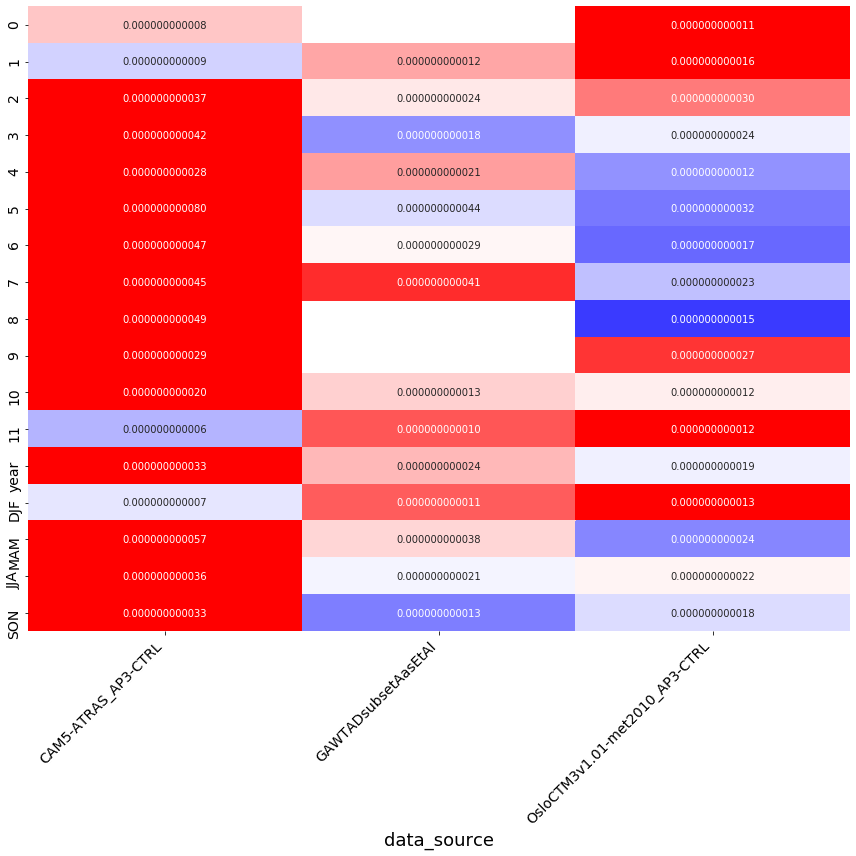

In [170]:
vars_to_retrieve = 'wetso4'
OBS_network = 'GAWTADsubsetAasEtAl'
list_model_ID = ['OsloCTM3v1.01-met2010_AP3-CTRL', 'CAM5-ATRAS_AP3-CTRL']
add_yearly = 'mean'
start = 2010
bias = True 
rmse = True
region = None

ungridded_data    = ReadUngridded().read(datasets_to_read = OBS_network, vars_to_retrieve = vars_to_retrieve)

# TODO collocated dataobject can now done by collocated data object, much less stuff to filter by (faster).

if region is not None:
    f              = Filter(region=region)
    ungridded_data = f(ungridded_data)

station_names     = ungridded_data.station_name # Is this used anymore. 
list_gridded_data = [pya.io.ReadGridded(ID).read(vars_to_retrieve = [vars_to_retrieve], start = start)[0] 
                     for ID in list_model_ID ]

# Possible to retrieve ts type of obeservation 
list_colocate = [pya.colocation.colocate_gridded_ungridded(gridded_data, ungridded_data, ts_type='monthly')
                for gridded_data in list_gridded_data]

# call merged : raw, bias : Bias, rmse : RMSE 
def fix_df(df):
    df = df.unstack('data_source').swaplevel().unstack('station_name')
    df2 = df['wetso4']

    df2.columns = df2.columns.swaplevel(0,1)
    df2.sort_index(axis = 1, level = (0, 1), inplace = True)
    return df2

dataframes = [ coloc.data.to_dataframe().drop(columns=['var_name', 'var_units','ts_type_src','altitude', 
                                                       'latitude', 'longitude']) for coloc in list_colocate ]
dataframes = [fix_df(df) for df in dataframes]

seasonal_means = [coloc.data.groupby('time.season').mean(dim = 'time', skipna = True) for coloc in list_colocate]
df_seasons = [fix_df(seasonal_mean.to_dataframe()) for seasonal_mean in seasonal_means]

for i in range(len(dataframes)):
    # Append yearly mean
    dataframes[i]       = dataframes[i].append( dataframes[i].mean(axis = 0), ignore_index = True)
    # Appends seasonal averages
    dataframes[i]       = dataframes[i].append( df_seasons[i], ignore_index = True)
    # Updates index to 
    dataframes[i].index = np.concatenate([np.arange(12), ['year', 'DJF', 'MAM', 'JJA', 'SON']])

lala = pd.concat(dataframes, axis = 1) # Merged dataframes containing diffent models.
lala.sort_index(axis = 1, level = (0, 1), inplace = True) # Sort index
df = lala.loc[:, ~lala.columns.duplicated()] # Removes duplicates
# In this case the obsevations are duplicated, since they are present in both model comparison.
df_to_heatmap(df.iloc[:, :10]['Abington (CT15)'], num_digits=12)